# Analysis for Phone Based Direct Marketing Campaign


# Phase 1:  Problem Understanding
Objectives:  After understanding the domain:
1. Learn about potential customers - understand who banks with us, who does not bank with us
2. Develop a model of identifying positive responders to a marketing campaign

### How does this translate to a data science problem?
<p>1. Learn about potential customers.<br>
A. EDA<br>
B. Clustering<br>
C. Association Rules<br><br></p>
<p>2. Develop a predictive model for positive responders<br><br>
A. Develop the best classification model<br>
   1. Decision Trees<br>
   2. Random Forests<br>
   3. Naive Bayes Classification<br>
   4. Neural Networks<br>
   5. Logistic Regression<br><br>
B. Evaluate each model, construct a table of models and costs<br><br>
C. Consult with management regarding the best model<br></p>



# Phase 2: Data Preparation

* Loading data to Pandas
* Adding an Index Field
* Understanding structure of data
* Changing Misleading Field Values
* Identifying Continuous and Categorical data, Reexpressing categorical data as numeric data
* Normalization and Standardizing Numeric Variables
* Methods to identify outliers<br><br>
More to come! 
* Measuring centrality of data
* Measuring spread of data

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
import random
import scipy.stats as stats
%matplotlib inline 
sns.set()

### 1. Loading data to pandas

Pandas can load data from various sources such sql db, txt file, csv file, excel etc. In following example cars.txt is loaded into pandas.

In [5]:
bank_train = pd.read_csv("bank_marketing_training")

### 2. Adding an index field
a. acts as an identifying or ID field
b. tracks sort order

In [6]:
# find number of records and columns
bank_train.shape

(26874, 21)

In [7]:
# create a new variable that assigns every record a unique integer
bank_train['index'] = pd.Series(range(0,26874))

In [8]:
# take a look
bank_train.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,days_since_previous,previous,previous_outcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,response,index
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no,0
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no,1
2,41,blue-collar,married,unknown,unknown,no,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no,2
3,25,services,single,high.school,no,yes,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no,3
4,29,blue-collar,single,high.school,no,no,yes,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no,4


### 3. Understanding structure of data

1. Looking at top rows of data
2. Looking at columns in data and their types
3. Describing / Summarizing data

In [9]:
# 1. As we ahave seen, the top rows can be seen by calling dataframe.head(), we can specify rows to display as parameter
# Ex. cars.head(2) will display top 2 rows in cars dataframe.
bank_train.head(10) # print top 10 rows of cars?

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,days_since_previous,previous,previous_outcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,response,index
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no,0
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no,1
2,41,blue-collar,married,unknown,unknown,no,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no,2
3,25,services,single,high.school,no,yes,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no,3
4,29,blue-collar,single,high.school,no,no,yes,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no,4
5,57,housemaid,divorced,basic.4y,no,yes,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no,5
6,35,blue-collar,married,basic.6y,no,yes,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no,6
7,39,management,single,basic.9y,unknown,no,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no,7
8,30,unemployed,married,high.school,no,no,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no,8
9,55,retired,single,high.school,no,yes,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no,9


In [11]:
#  2. Structure of dataframe can looked by calling dataframe.info() function.
#  N entries - N rows in dataframe
#  N columns - N columns in dataframe 
#  Together they show dimension of data frame.
#  Data columns, total count, default, and dtype of each column is also shown for ex

bank_train.info()

#Note - object fields are "Probably" categorical

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26874 entries, 0 to 26873
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  26874 non-null  int64  
 1   job                  26874 non-null  object 
 2   marital              26874 non-null  object 
 3   education            26874 non-null  object 
 4   default              26874 non-null  object 
 5   housing              26874 non-null  object 
 6   loan                 26874 non-null  object 
 7   contact              26874 non-null  object 
 8   month                26874 non-null  object 
 9   day_of_week          26874 non-null  object 
 10  duration             26874 non-null  int64  
 11  campaign             26874 non-null  int64  
 12  days_since_previous  26874 non-null  int64  
 13  previous             26874 non-null  int64  
 14  previous_outcome     26874 non-null  object 
 15  emp.var.rate         26874 non-null 

In [13]:
#Looking at column names closely
bank_train.columns
# look for odd column names
# as a part of your domain knowledge, you should understand all features

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign',
       'days_since_previous', 'previous', 'previous_outcome', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed',
       'response', 'index'],
      dtype='object')

In [15]:
#Let us fix the "dots" in column names (can be used for spaces, etc.)
bank_train.columns = bank_train.columns.str.replace(".", "_") #Replace the periods with underscore
bank_train.columns

C:\Users\pthompso\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  


Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign',
       'days_since_previous', 'previous', 'previous_outcome', 'emp_var_rate',
       'cons_price_idx', 'cons_conf_idx', 'euribor3m', 'nr_employed',
       'response', 'index'],
      dtype='object')

In [16]:
# description or summary
# calling dataframe.describe() returns count, mean, std, min, max and other quantiles for continuous variables
bank_train.describe()

,age,duration,campaign,days_since_previous,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,index
count,26874.000000,26874.000000,26874.000000,26874.000000,26874.000000,26874.000000,26874.000000,26874.000000,26874.000000,26874.000000,26874.000000
mean,39.987758,257.741907,2.563035,962.714631,0.171058,0.086552,93.575794,-40.481670,3.627879,5167.103446,13436.500000
std,10.400285,258.977140,2.748746,186.324546,0.487657,1.569716,0.578933,4.626506,1.731948,72.080534,7757.999903
min,17.000000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.000000,0.000000
25%,32.000000,103.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.000000,6718.250000
50%,38.000000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000,13436.500000
75%,47.000000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.000000,20154.750000
max,91.000000,4918.000000,43.000000,999.000000,6.000000,1.400000,94.767000,-26.900000,5.045000,5228.000000,26873.000000


In [17]:
# Are there missing values?
bank_train.isna().sum()

age                    0
job                    0
marital                0
education              0
default                0
housing                0
loan                   0
contact                0
month                  0
day_of_week            0
duration               0
campaign               0
days_since_previous    0
previous               0
previous_outcome       0
emp_var_rate           0
cons_price_idx         0
cons_conf_idx          0
euribor3m              0
nr_employed            0
response               0
index                  0
dtype: int64

In [18]:
# What about categorical variables
# Despite marital status being category, it is not loaded as categorical variable.
# Note the dtype or data type is object not category
bank_train.marital

0        married
1        married
2        married
3         single
4         single
          ...   
26869    married
26870    married
26871     single
26872    married
26873    married
Name: marital, Length: 26874, dtype: object

In [19]:
# Change marital astype to Category
bank_train.marital = bank_train.marital.astype('category')
bank_train.marital.cat.categories #Print now shows the categories

Index(['divorced', 'married', 'single', 'unknown'], dtype='object')

In [20]:
# Crosstab is a neat way to create table of 2 variables
# Here we can see marital categories with the number of each age in the category
# this could be improved by adding a new attribute that groups the age
pd.crosstab(bank_train.marital, bank_train.age)

age,17,18,19,20,21,22,23,24,25,26,...,80,81,82,83,84,85,86,88,89,91
marital,,,,,,,,,,,,,,,,,,,,,
divorced,0,0,0,0,0,0,0,2,11,10,...,11,5,5,3,3,2,2,11,2,0
married,0,0,0,0,6,14,20,56,102,132,...,10,8,5,6,1,8,4,2,0,2
single,4,23,26,40,56,86,134,243,291,320,...,0,0,2,0,0,0,1,0,0,0
unknown,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


### 4. Changing Misleading Field Values
from researching the meta data and the domain, we have learned that "days_since_previous" has 999 when this is not known. We want to replace this with NaN so Python can more effectively handle the value.

<AxesSubplot:title={'center':'Histogram of Days Since Previous'}, ylabel='Frequency'>

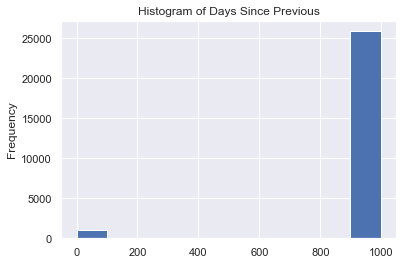

In [30]:
# lets create a histogram to look more closely
# this looks odd and many of the records are listed as 999
bank_train['days_since_previous'].plot(kind = 'hist', title = 'Histogram of Days Since Previous')

In [31]:
# we will use numpy which has already been imported
# and change the 999 to np.Nan so Python can handle the data appropriately
bank_train['days_since_previous'] = bank_train['days_since_previous'].replace({999: np.NaN})

In [32]:
# lets take a look
bank_train.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,days_since_previous,previous,previous_outcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,response,index
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,NaN,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no,0
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,NaN,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no,1
2,41,blue-collar,married,unknown,unknown,no,no,telephone,may,mon,...,NaN,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no,2
3,25,services,single,high.school,no,yes,no,telephone,may,mon,...,NaN,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no,3
4,29,blue-collar,single,high.school,no,no,yes,telephone,may,mon,...,NaN,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no,4


<AxesSubplot:title={'center':'Histogram of Days Since Previous'}, ylabel='Frequency'>

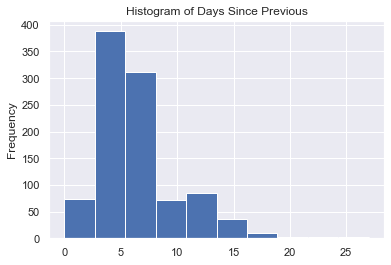

In [33]:
# lets create a histogram to look more closely
# how are Nan's handled in the histogram?
bank_train['days_since_previous'].plot(kind = 'hist', title = 'Histogram of Days Since Previous')

### 5. Reexpression of Categorical Data as Numeric
when a categorical feature should be ordered, it should be changed to numeric
This is true for Education - your data science algorithms should treat masters as higher than high school


In [34]:
# first replicated the variable 
bank_train['education_numeric'] = bank_train['education']

In [37]:
# next set up a dictionary specifically for conversion
dict_edu = {"education_numeric": {"illiterate": 0, "basic.4y": 4, "basic.6y": 6, 
                                 "basic.9y": 9, "high.school": 12, "professional.course": 12,
                                 "university.degree": 16, "unknown": np.NaN}}

In [38]:
# finally tell Python to use the dictionary to replace the variable's values
bank_train.replace(dict_edu, inplace=True)

In [39]:
# lets take a look!
bank_train.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,previous,previous_outcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,response,index,education_numeric
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no,0,4.0
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no,1,12.0
2,41,blue-collar,married,unknown,unknown,no,no,telephone,may,mon,...,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no,2,NaN
3,25,services,single,high.school,no,yes,no,telephone,may,mon,...,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no,3,12.0
4,29,blue-collar,single,high.school,no,no,yes,telephone,may,mon,...,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no,4,12.0


### 6. Standardizing the numeric attributes
Certain algorithms perform better when the numeric fields are standardized. This can be done by min-max normalization and z-score standardization.  Decimal scaling is a third method.


#### <font color = 'green'> 1. Min Max Normalization</font>

$$X_{min-max} = \frac{X - X_{min}}{X_{max} - X_{min}}$$

* Min Max normalizes data between 0 and 1
* Python provides Min Max Scaler for Min Max normalization

#### <font color = 'green'> 2. Z-score transformation</font>

$$X_{z-score} = \frac{X - X_{mean}}{X_{std}}$$

* z-score normalizes data between -3 and +3
* this can be done with the sklearn.preprocessing library using StandardScaler
* or stats.zscore from scipy

In [40]:
# we will use the Z-score transformation to standardize age into a new variable age_z
bank_train['age_z'] = stats.zscore(bank_train['age'])

In [41]:
# once again, let's take a look
bank_train.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,previous_outcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,response,index,education_numeric,age_z
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,nonexistent,1.1,93.994,-36.4,4.857,5191,no,0,4.0,1.539625
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,nonexistent,1.1,93.994,-36.4,4.857,5191,no,1,12.0,1.635778
2,41,blue-collar,married,unknown,unknown,no,no,telephone,may,mon,...,nonexistent,1.1,93.994,-36.4,4.857,5191,no,2,NaN,0.097330
3,25,services,single,high.school,no,yes,no,telephone,may,mon,...,nonexistent,1.1,93.994,-36.4,4.857,5191,no,3,12.0,-1.441118
4,29,blue-collar,single,high.school,no,no,yes,telephone,may,mon,...,nonexistent,1.1,93.994,-36.4,4.857,5191,no,4,12.0,-1.056506


### 7. Identifying Outliers
we can use z values to identify outliers, an outlier is a z-score of greater than 3 or less than -3 (rough rule of thumb).  Note:  the data scientist should consult with management regarding what to do with outliers. Sometimes unusual values tell a story about the data and should not always be removed and/or ignored.

In [43]:
# identify outliers
# this will return all records with age gt 3 and age lt -3
bank_train.query('age_z > 3 | age_z < -3')

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,previous_outcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,response,index,education_numeric,age_z
18166,73,retired,married,university.degree,no,yes,no,cellular,mar,tue,...,failure,-1.8,92.843,-50.0,1.687,5099,no,18166,16.0,3.174226
18179,88,retired,divorced,basic.4y,no,yes,no,cellular,mar,wed,...,nonexistent,-1.8,92.843,-50.0,1.663,5099,no,18179,4.0,4.616521
18181,88,retired,divorced,basic.4y,no,no,no,cellular,mar,wed,...,nonexistent,-1.8,92.843,-50.0,1.663,5099,yes,18181,4.0,4.616521
18183,88,retired,divorced,basic.4y,no,yes,yes,cellular,mar,wed,...,nonexistent,-1.8,92.843,-50.0,1.663,5099,yes,18183,4.0,4.616521
18186,88,retired,divorced,basic.4y,no,yes,no,cellular,mar,wed,...,nonexistent,-1.8,92.843,-50.0,1.663,5099,yes,18186,4.0,4.616521
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26735,84,retired,divorced,basic.4y,unknown,yes,no,cellular,oct,fri,...,nonexistent,-1.1,94.601,-49.5,0.993,4963,no,26735,4.0,4.231909
26739,74,retired,divorced,basic.4y,no,yes,no,cellular,oct,mon,...,nonexistent,-1.1,94.601,-49.5,1.000,4963,no,26739,4.0,3.270379
26740,74,retired,divorced,basic.4y,no,yes,no,cellular,oct,mon,...,success,-1.1,94.601,-49.5,1.000,4963,no,26740,4.0,3.270379
26750,81,retired,married,basic.4y,no,yes,no,cellular,oct,wed,...,failure,-1.1,94.601,-49.5,1.016,4963,yes,26750,4.0,3.943450


In [50]:
# let's do some exploration into the outliers
# lets create a new dataset with just these recs and then sort them
bank_train_outliers = bank_train.query('age_z > 3 | age_z < -3')
bank_train_sort = bank_train_outliers.sort_values(['age_z'], ascending = False)

In [49]:
# just for fun let's see the largest 15
bank_train_sort[['age', 'marital']].head(15)

,age,marital
24840,91,married
24833,91,married
26520,89,divorced
26015,89,divorced
23628,88,divorced
25098,88,divorced
26516,88,married
26509,88,married
18179,88,divorced
18191,88,divorced


# The End